In [40]:
#fonte tasso di interesse = https://infostat.bancaditalia.it/inquiry/home?spyglass/taxo:CUBESET=/PRINC_IND_00/PRINC_IND_01/PRINC_IND_02/PRINC_IND_02_02&ITEMSELEZ=BAM_MIR.M.1300010.MIR5411.9.950.1000.SBI17.EUR.110.212:true&OPEN=false/&ep:LC=IT&COMM=BANKITALIA&ENV=LIVE&CTX=DIFF&IDX=1&/view:CUBEIDS=BAM_MIR.M.1300010.MIR5411.9.950.1000.SBI17.EUR.110.212
#Fonte case : https://fred.stlouisfed.org/series/QITR628BIS

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dateparser

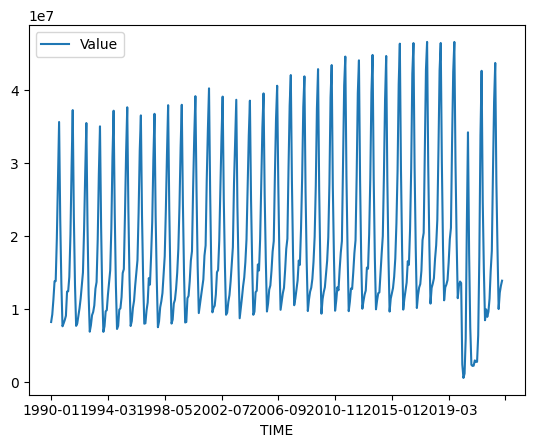

In [42]:
Turisti = pd.read_csv('/home/francesco/Codici/Computazionale/DC2/Italia/DCSC_TUR_23042023123434505.csv')
Turisti = Turisti[Turisti['Correzione'] == 'dati grezzi']
Turisti = Turisti[Turisti['Indicatori'] == 'presenze']
Turisti = Turisti[Turisti['TIPO_ALLOGGIO2'] == 'ALL']
Turisti = Turisti[Turisti['Paese di residenza dei clienti'] == 'Mondo']
Turisti = Turisti[Turisti['Tipologia di esercizio'] == 'totale esercizi ricettivi']
Turisti = Turisti[Turisti['Ateco 2007'] == 'alberghi e strutture simili']
Turisti.plot('TIME' , 'Value')
Turisti.drop(columns=['ITTER107' , 'Territorio' , 'TIPO_DATO7' , 'Indicatori',	'CORREZ',	'Correzione',	'TIPO_ALLOGGIO2',	'Tipologia di esercizio',	'ATECO_2007',	'Ateco 2007',	'ISO',
                      	'Paese di residenza dei clienti' , 'Flags' , 'Flag Codes'] , inplace=True)
Turisti.TIME = pd.to_datetime(Turisti.TIME , format = '%Y-%m')
pippo = []
calippo = []
Turisti.reset_index(inplace=True)
for i in range(0 ,len(Turisti.TIME)-2 , 3):
    pippo.append(Turisti.Value[i:i+2].sum())
    calippo.append(Turisti.TIME[i+2])

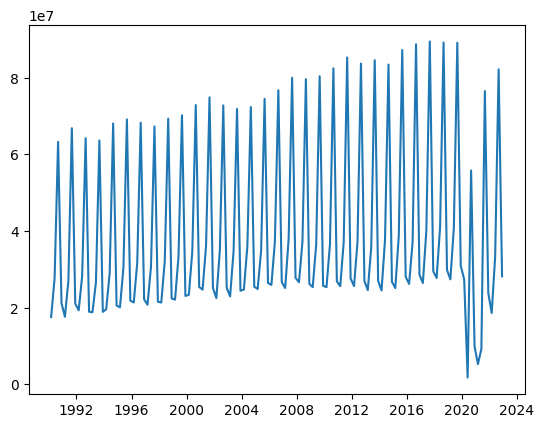

In [43]:
plt.plot(calippo, pippo)
Dati = {'TIME' : calippo , 'Turisti' : pippo }
Dati = pd.DataFrame(Dati)
Dati.to_csv('Turisti_ripuliti.csv' , index = False)